In [34]:
%load_ext autoreload
%autoreload 2

import os
import json
import pandas as pd
from loguru import logger
from glob import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
folder_path = '../data/interim/jokes'
jsonl_files = glob(os.path.join(folder_path, '*.jsonl'))
all_corrected_transcripts = []

for file in jsonl_files:
    with open(file, 'r', encoding='latin-1') as f:
        for line in f:
            data = json.loads(line)
            all_corrected_transcripts.append(data['corrected_transcript'])

df = pd.DataFrame(all_corrected_transcripts, columns=['text'])
df = df.drop_duplicates()

## Word Count

In [36]:
# remove duplicates
df = df.drop_duplicates()

# add word count column
df['word_count'] = df['text'].apply(lambda x: len(x.split()))


In [37]:
df.describe()

,word_count
count,10902.000000
mean,35.557879
std,42.521441
min,1.000000
25%,11.000000
50%,25.000000
75%,50.000000
max,585.000000


<Axes: >

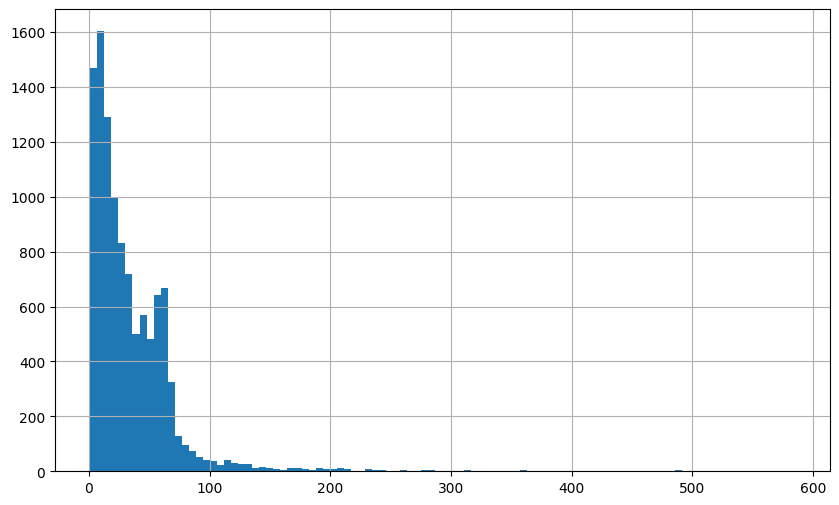

In [38]:
# histogram of word count
df['word_count'].hist(bins=100, figsize=(10, 6))

In [40]:
# remove the top 5% and then filter word_count > 10 and 
df = df[df['word_count'] < df['word_count'].quantile(0.95)]
df = df[df['word_count'] > 10]
df.shape

(7806, 2)

In [41]:
df.describe()

,word_count
count,7806.000000
mean,36.255573
std,18.960153
min,11.000000
25%,19.000000
50%,33.000000
75%,53.000000
max,85.000000


<Axes: >

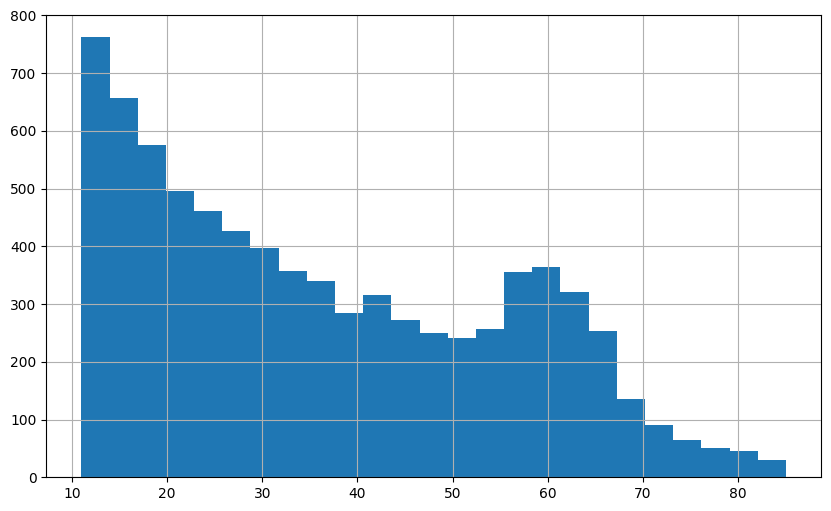

In [42]:
# histogram of word count
df['word_count'].hist(bins=25, figsize=(10, 6))

## Levels of Intentionality

## Keywords

## Creating the datasets for fine-tuning

In [33]:
# save to procesed folder in jsonl format
df[['text']].to_json('../data/processed/jokes.jsonl', orient='records', lines=True)